<a href="https://colab.research.google.com/github/Harshita-Pokharna/CAPSTONE-PROJECT--Netflix-Movies-And-Tv-shows-Clustering/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows: Clustering

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Harshita Pokharna

# **Project Summary -**

# **GitHub Link -**

https://github.com/Harshita-Pokharna/CAPSTONE-PROJECT--Netflix-Movies-And-Tv-shows-Clustering

# **Problem Statement**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [74]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Import Data Visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

### Dataset Loading

In [75]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
data=pd.read_csv("/content/drive/MyDrive/capstone project 5/Netflix Movies And Tv Shows Clustering.csv")
data_new=data.copy()

### Dataset First View

In [77]:
# Dataset First Look
# Fisrt 5 Rows of dataset
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [78]:
# Last 5 Rows of dataset
data.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [79]:
# Dataset Rows & Columns count
rows=data.shape[0]
columns=data.shape[1]
print(f"The number of Rows is {rows} and number of Columns is {columns}")

The number of Rows is 7787 and number of Columns is 12


### Dataset Information

In [80]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [82]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [83]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

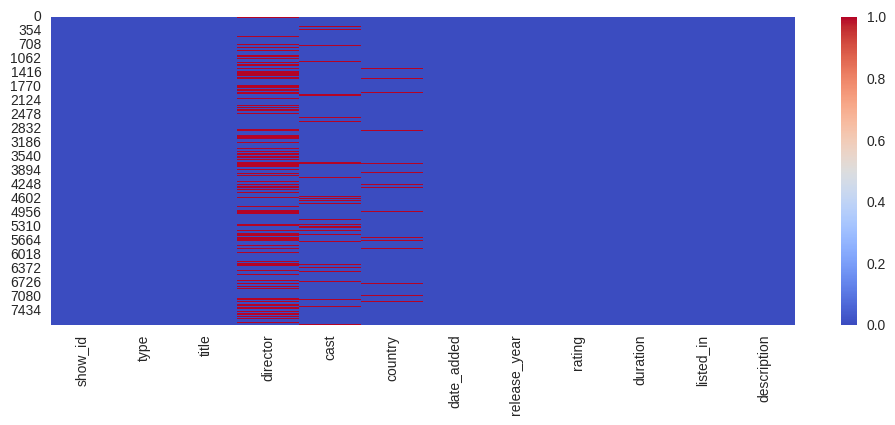

In [84]:
# Visualizing the missing values using HeatMap
plt.figure(figsize=(12,4))
sns.heatmap(data.isna(), cmap = 'coolwarm')

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [81]:
# Dataset Columns
column_names=list(data.columns)
print("Columns present in Dataset are :")
column_names

Columns present in Dataset are :


['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [85]:
# Dataset Describe
data.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

### Check Unique Values for each variable.

In [86]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i," = ",data[i].nunique(),)

No. of unique values in  show_id  =  7787
No. of unique values in  type  =  2
No. of unique values in  title  =  7787
No. of unique values in  director  =  4049
No. of unique values in  cast  =  6831
No. of unique values in  country  =  681
No. of unique values in  date_added  =  1565
No. of unique values in  release_year  =  73
No. of unique values in  rating  =  14
No. of unique values in  duration  =  216
No. of unique values in  listed_in  =  492
No. of unique values in  description  =  7769


## 3. ***Data Wrangling***

### Data Wrangling Code

####**Handling Duplicate values**

In [87]:
## check duplicate rows in dataset
data.duplicated().sum()

0

**So there is no duplicate value in our dataset**

####**Handling Null Values**

In [88]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Columns containing null values are :**
1. director
2. cast
3. country
4. date_added
5. release_year


In [90]:
#'date_added' and 'rating' have low number of missing values i.e. 10 and 7 respectively, so we will drop them from the dataset
data.dropna(subset=['date_added','rating'],inplace=True)

In [91]:
# Imputing null values of country with Mode
data['country']=data['country'].fillna(data['country'].mode()[0])

In [92]:
# Imputing with unknown in null values of director and cast feature
data[['director','cast']]=data[['director','cast']].fillna("Unknown")


####**Data Transformation**

**Typecasting 'date_added' from string to datetime:**

In [94]:
# Converting the 'date_added' column to a datetime data type.
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')


In [95]:
# Extracting  month and year from date_added column
data['year_added'] = pd.DatetimeIndex(data['date_added']).year
data['month_added'] = pd.DatetimeIndex(data['date_added']).month
data.drop('date_added', axis=1, inplace=True)


**Typecasting 'duration' from string to integer**

In [ ]:
# Splitting the duration column and changing the datatype to integer
data['duration'] = data['duration'].str.split().str[0].astype(int)

# Number of seasons for TV shows
tv_show_seasons = data.loc[data['type'] == 'TV Show', 'duration'].value_counts()

# Movie length in minutes
movie_lengths = data.loc[data['type'] == 'Movie', 'duration'].unique()

# Datatype of duration
duration_dtype = data['duration'].dtype

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7682 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7682 non-null   object 
 1   type          7682 non-null   object 
 2   title         7682 non-null   object 
 3   director      7682 non-null   object 
 4   cast          7682 non-null   object 
 5   country       7682 non-null   object 
 6   release_year  7682 non-null   int64  
 7   rating        7682 non-null   object 
 8   duration      7682 non-null   int64  
 9   listed_in     7682 non-null   object 
 10  description   7682 non-null   object 
 11  year_added    7682 non-null   float64
 12  month_added   7682 non-null   float64
 13  target_ages   7682 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 900.2+ KB


**From the above information we can see that datatype of year_added and month_added is float64 so we need to convert it to integer as float type is of no use for year and month.**

**Typecasting 'year_added' and 'month_added' from float to integer**

In [104]:
data['year_added'] = data['year_added'].astype(int)
data['month_added'] = data['month_added'].astype(int)

In [105]:
##Checking for null values after transformation
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
target_ages     0
dtype: int64

We got 88 null values each in year_added and month_added,so it's best to drop them to avoid any kind of error.

In [ ]:
data.dropna(subset=['year_added','month_added'],inplace=True)

####**Binning of Rating attribute**

In [99]:
data['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**Adults:** Typically, this category includes viewers who are 18 years old and above. It is intended for mature content suitable for adult audiences. years  The content within this category is often tailored to the interests and experiences of adults.

**Teens:** This category generally targets viewers in their teenage years, typically ranging from 13 to 17 years old. The content within this category is often suitable for teenage audiences.

**Older Kids:** This category typically includes viewers who are older children, usually ranging from 7 to 12 years old. The content within this category is generally suitable for children in this age group.

**Kids:** This category is designed for younger viewers, usually up to the age of 6 or 7 years old. The content within this category is typically appropriate for preschool-age children.

**NOTE** - Age limits and content classifications can vary based on regional regulations and individual content ratings established by Netflix. The specific age ranges mentioned above are provided as general guidelines and may vary depending on the country or region.

**Create bins as following:**

**Adults**: TV-MA, NC-17,R,NR

**Teen** : PG-13, TV-14

**Older Kids**: TV-PG, PG, TV-Y7, TV-Y7-FV

**Kids** : G, TV-Y,TV-G

In [100]:
# Assigning the ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)



**Choosing the Primary key of country,listed_in and cast**

In [102]:
# Choosing the primary country,primary genre and primary cast to simplify the analysis
data['country'] = data['country'].apply(lambda x: x.split(',')[0])
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(',')[0])
data['cast'] = data['cast'].apply(lambda x: x.split(',')[0])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7682 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7682 non-null   object 
 1   type          7682 non-null   object 
 2   title         7682 non-null   object 
 3   director      7682 non-null   object 
 4   cast          7682 non-null   object 
 5   country       7682 non-null   object 
 6   release_year  7682 non-null   int64  
 7   rating        7682 non-null   object 
 8   duration      7682 non-null   int64  
 9   listed_in     7682 non-null   object 
 10  description   7682 non-null   object 
 11  year_added    7682 non-null   float64
 12  month_added   7682 non-null   float64
 13  target_ages   7682 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 900.2+ KB


### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [18]:
# number of values of different categories in 'type'
data['type'].value_counts()

type
Movie      5372
TV Show    2310
Name: count, dtype: int64

In [19]:
data['text_attributes'] = data['description']+" "+data["director"]+" "+data["listed_in"]+" "+data["type"]+" "+data["rating"]+" "+data["country"]


In [20]:
# Cross checking our result for the function created
print(data['text_attributes'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. Unknown International TV Shows TV Show TV-MA Brazil


In [21]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
data['text_attributes'] = data['text_attributes'].apply(to_lower)

# Cross checking our result for the function created
print(data['text_attributes'][0])


in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. unknown international tv shows tv show tv-ma brazil


In [22]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [23]:
# Removing Punctuations from the text_attributes
data['text_attributes']= data['text_attributes'].apply(remove_punctuations)

# Checking the observation after manipulation
print(data['text_attributes'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor unknown international tv shows tv show tvma brazil


In [24]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [25]:
# Remove URLs & Remove words and digits contain digits
data['text_attributes']= data['text_attributes'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
print(data['text_attributes'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the   saved from squalor unknown international tv shows tv show tvma brazil


In [26]:
import re
# Using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
# displaying stopwords
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
#Defining stopwords
def remove_stopwords_and_whitespaces(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]

    # joining the list of words with space separator
    text = " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text


In [29]:
# applying above function on text feature
data['text_attributes']=data['text_attributes'].apply(remove_stopwords_and_whitespaces)

#Checking the observation after manipulation
print(data['text_attributes'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor unknown international tv shows tv show tvma brazil


In [30]:
# Tokenization
# Loading Libraries
import nltk
nltk.download('punkt')

# Apply the tokenization to the 'tags' column of the DataFrame
data['text_attributes'] = data['text_attributes'].apply(nltk.word_tokenize)

#Checking the observation after manipulation
print(data['text_attributes'][0])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_text_attributes = data['text_attributes']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'unknown', 'international', 'tv', 'shows', 'tv', 'show', 'tvma', 'brazil']


In [31]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [32]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [33]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
data['text_attributes']= data['text_attributes'].apply(lemmatizing_sentence)

#Checking the observation after manipulation
print(data['text_attributes'][0])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


future elite inhabit island paradise far crowded slum get one chance join saved squalor unknown international tv show tv show tvma brazil


In [34]:
# tokenize the text into words before POS Taging
data['pos_tags'] = data['text_attributes'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
data.head(5)

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%            Unknown    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

   release_year rating  duration               listed_in  \
0          2020  TV-MA         4  International TV Shows   
1          2016  TV-MA        93                  Dramas   
2          2011      R        78           Horror Movies   
3          2009  PG-13        80      Action & Adventure   
4          2008  PG-13       123                  Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

  target_ages                                    text_attributes  \
0      Adults  future elite inhabit island paradise far crowd...   
1      Adults  devastating earthquake hit mexico city trapped...   
2      Adults  army recruit found dead fellow soldier forced ...   
3       Teens  postapocalyptic world ragdoll robot hide fear ...   
4       Teens  brilliant group student become cardcounting ex...   

                                            pos_tags  
0  [(future, JJ), (elite, JJ), (inhabit, NN), (is...  
1  [(devastating, VBG), (earthquake, NN), (hit, V...  
2  [(army, NN), (recruit, NN), (found, VBN), (dea...  
3  [(postapocalyptic, JJ), (world, NN), (ragdoll,...  
4  [(brilliant, JJ), (group, NN), (student, NN), ...

In [35]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=20000)        # Setting max features as 20000 to avoid RAM explosion

In [36]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(data['text_attributes'])

# Checking shape of the formed document matrix
print(x.shape)

(7682, 20000)


In [37]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.14258569e-02 4.03632070e-03 3.81261778e-03 ... 1.13673454e-35
 6.19126035e-36 3.78280205e-36]


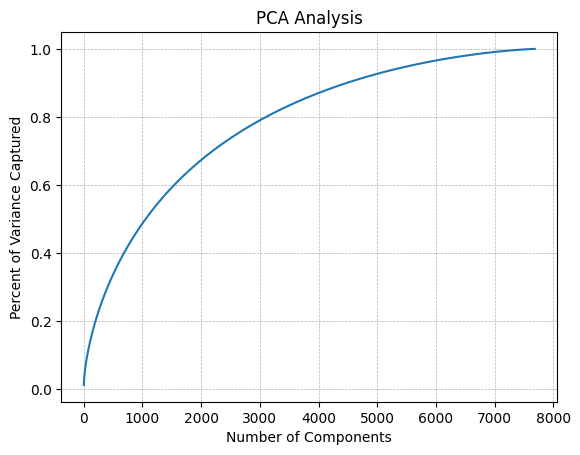

In [38]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

In [40]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7682, 5543)

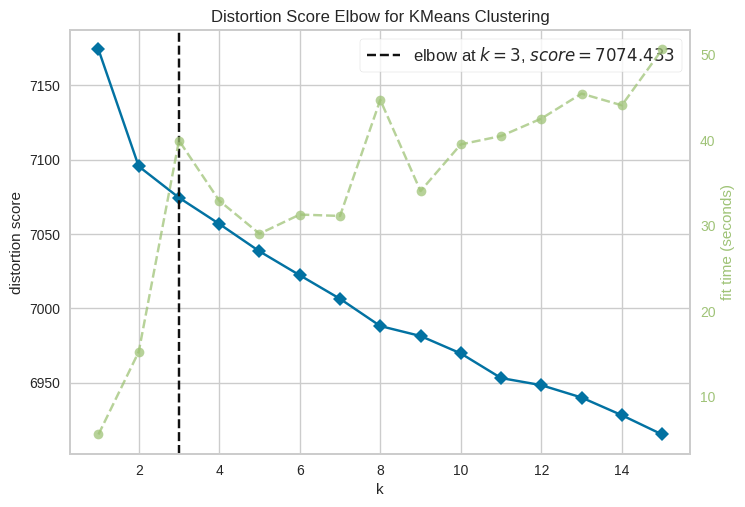

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

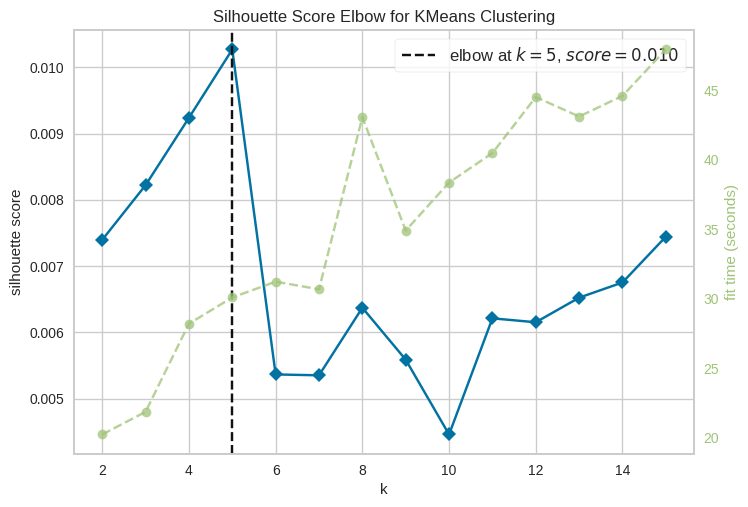

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

In [43]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.007969
k=3, Silhouette score=0.008705
k=4, Silhouette score=0.009507
k=5, Silhouette score=0.010221
k=6, Silhouette score=0.010066


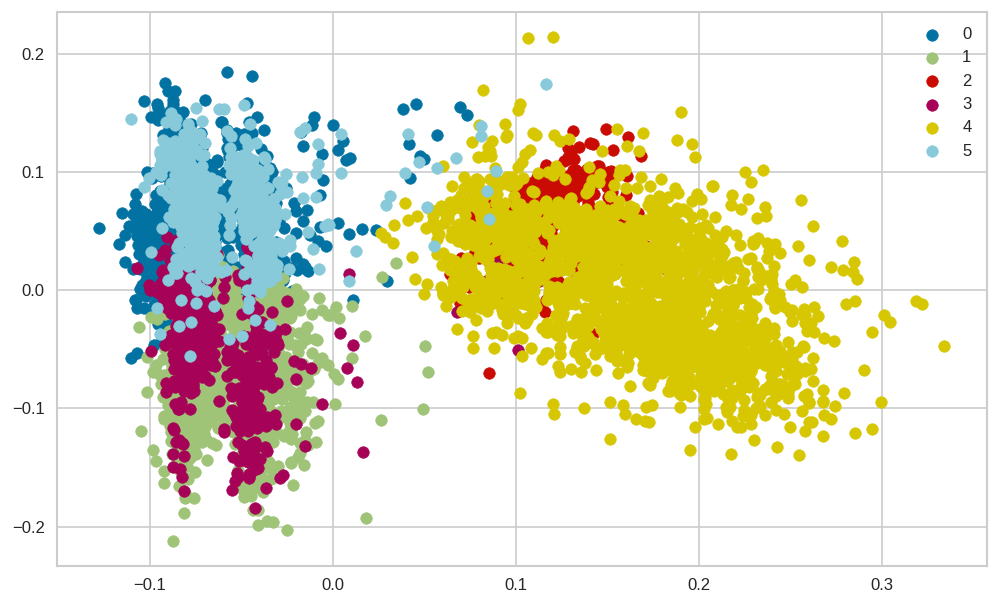

In [56]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

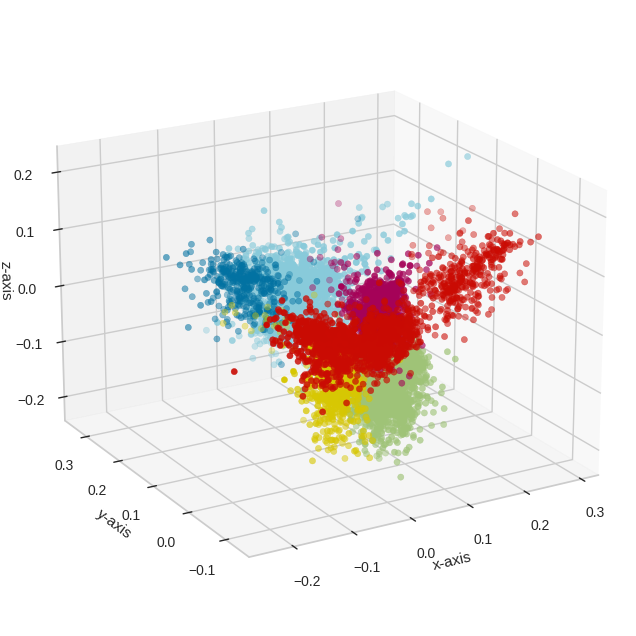

In [57]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y','c','m']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [58]:
# Add cluster values to the dateframe.
data['kmeans_cluster'] = kmeans.labels_

In [59]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    data_wordcloud = data[['kmeans_cluster', column_name]].dropna()
    data_wordcloud = data_wordcloud[data_wordcloud['kmeans_cluster'] == cluster_number]
    data_wordcloud = data_wordcloud[data_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in data_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

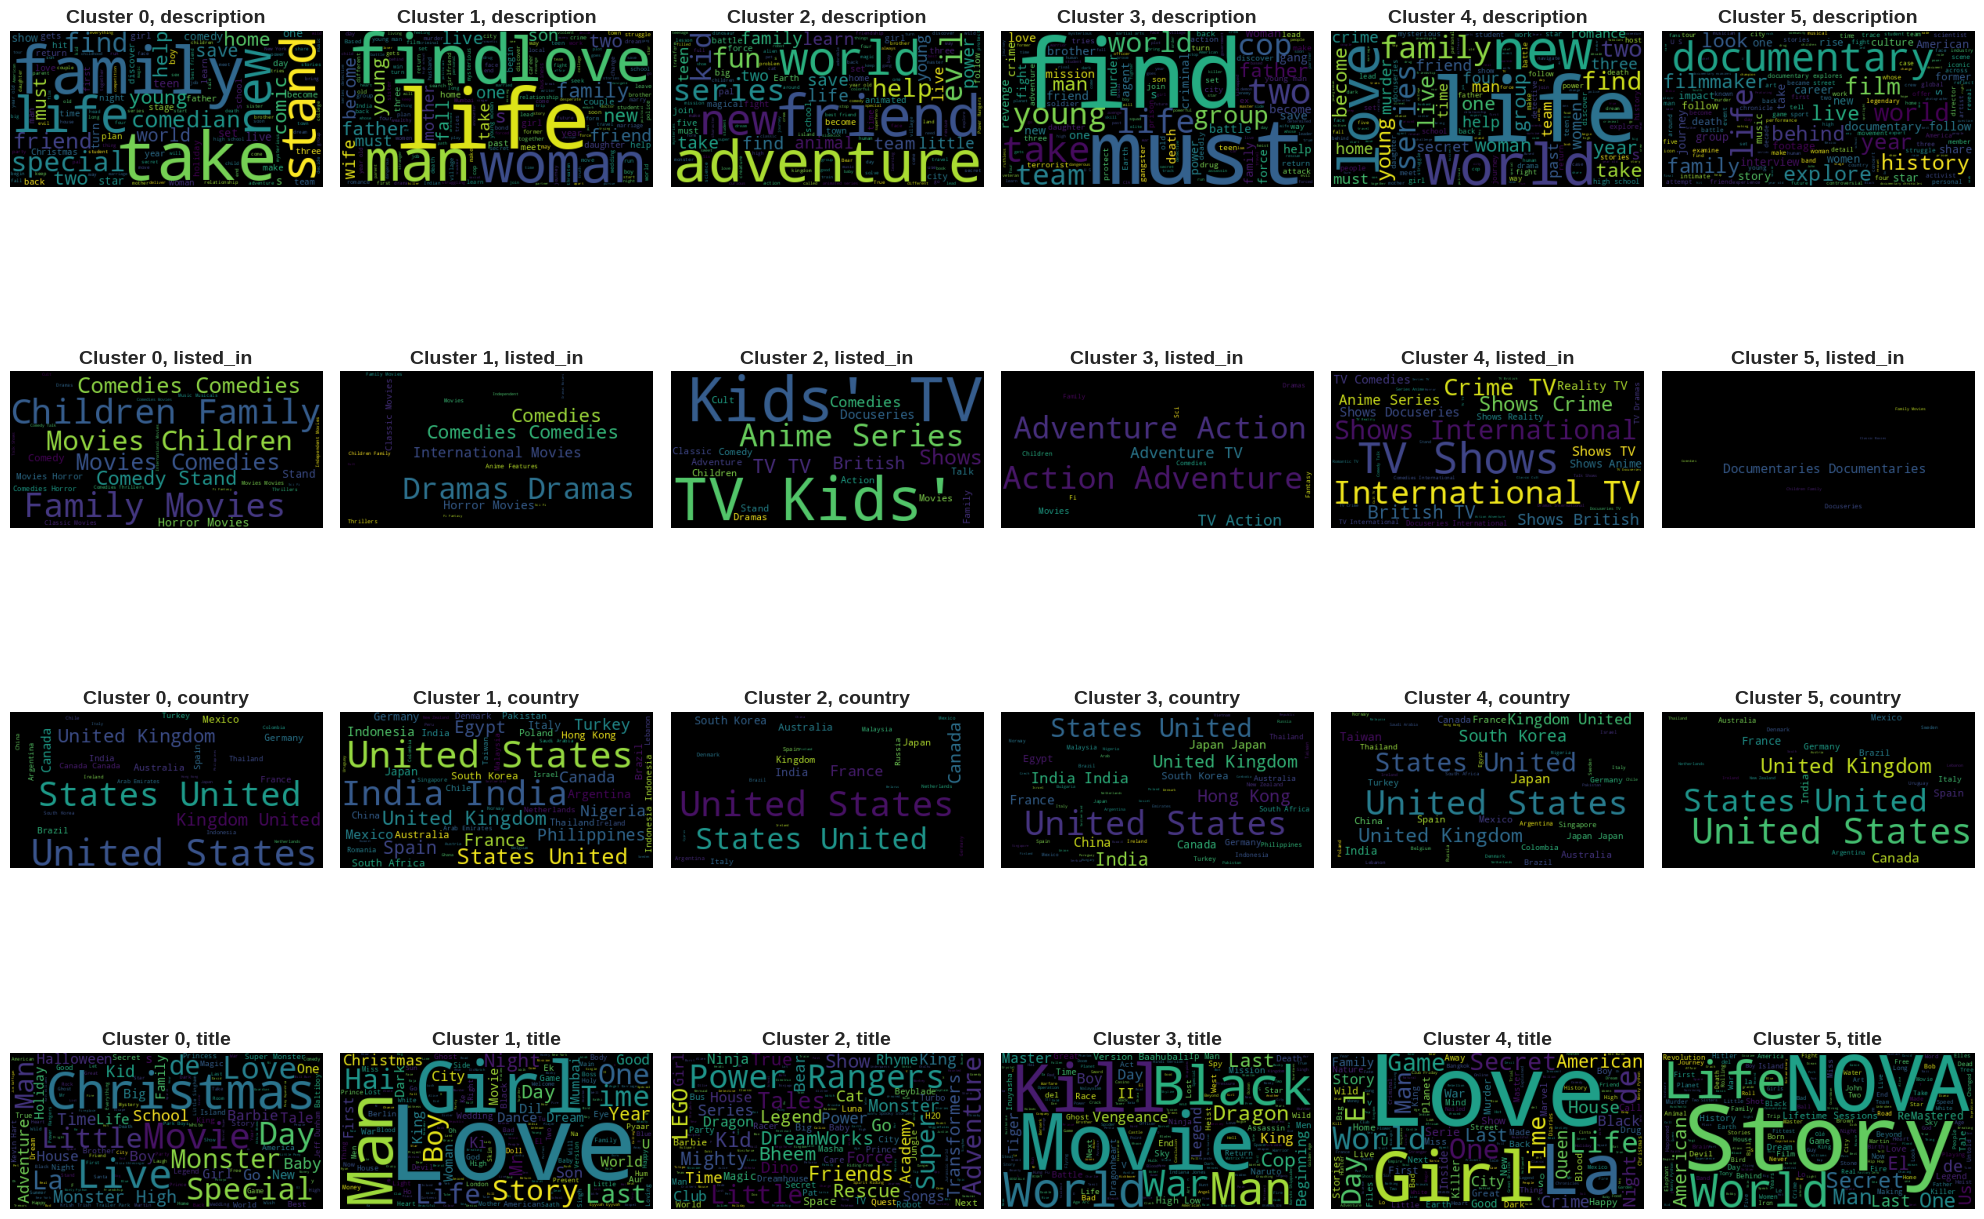

In [60]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))
for i in range(6):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

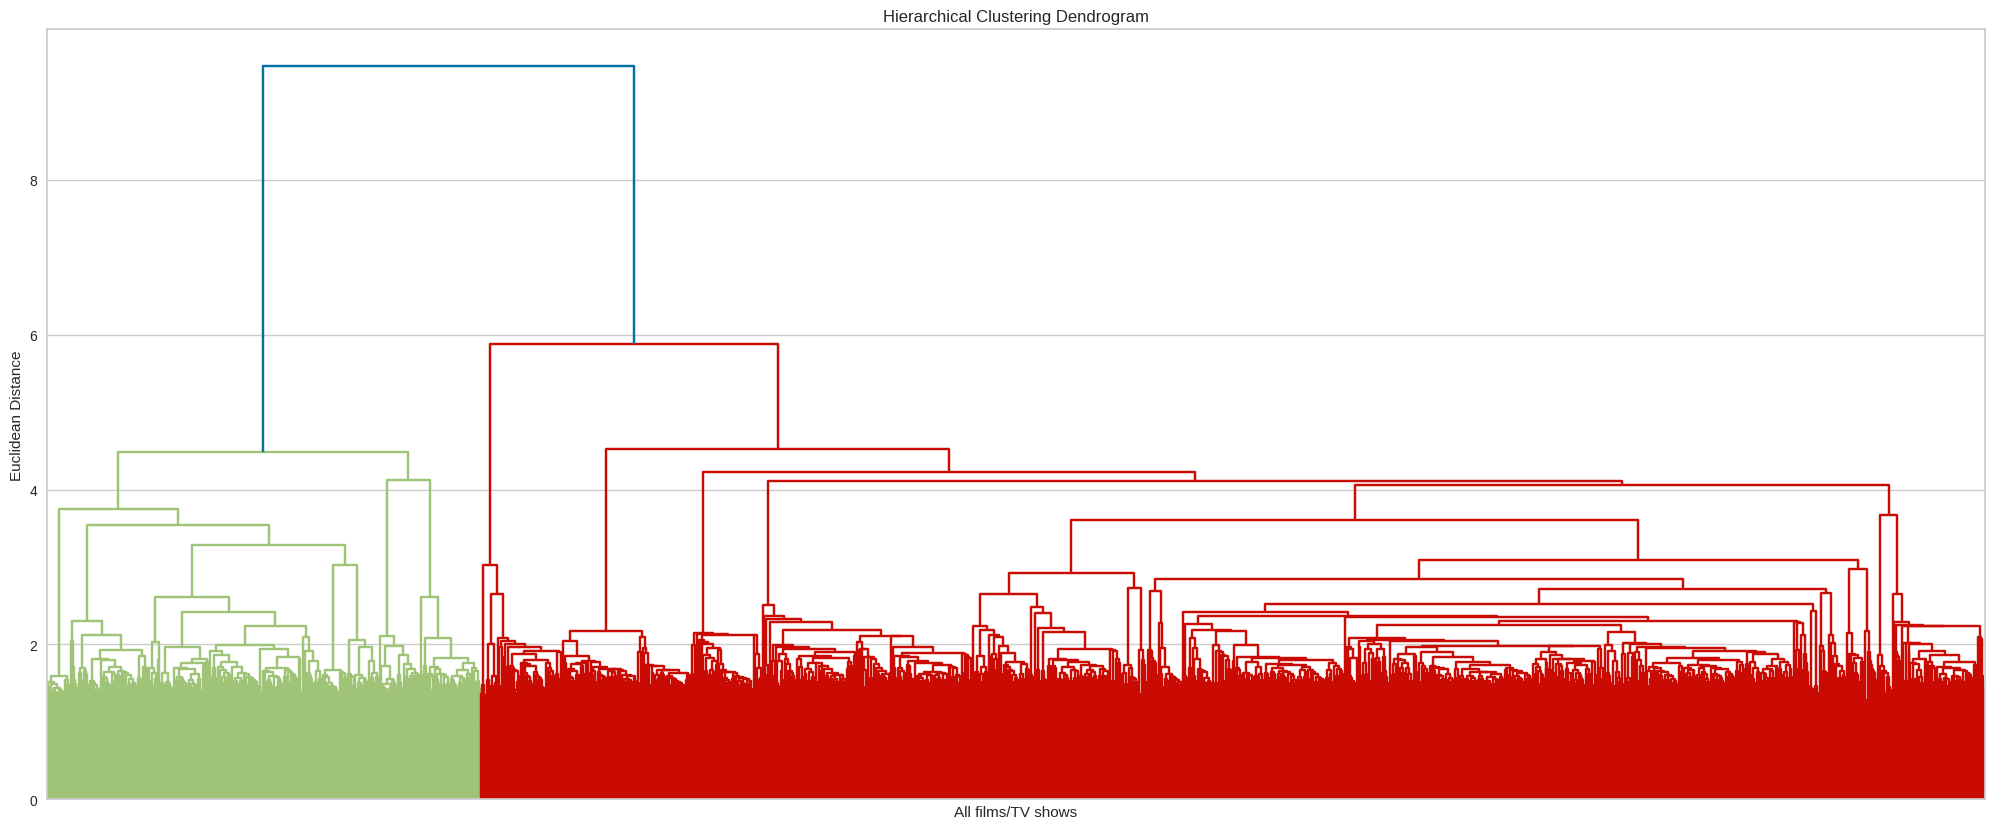

In [61]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [62]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 7)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.003166
k=3, Silhouette score=0.002950
k=4, Silhouette score=0.002997
k=5, Silhouette score=0.000522
k=6, Silhouette score=0.000004


From the above silhouette scores it is clear that the 2 clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

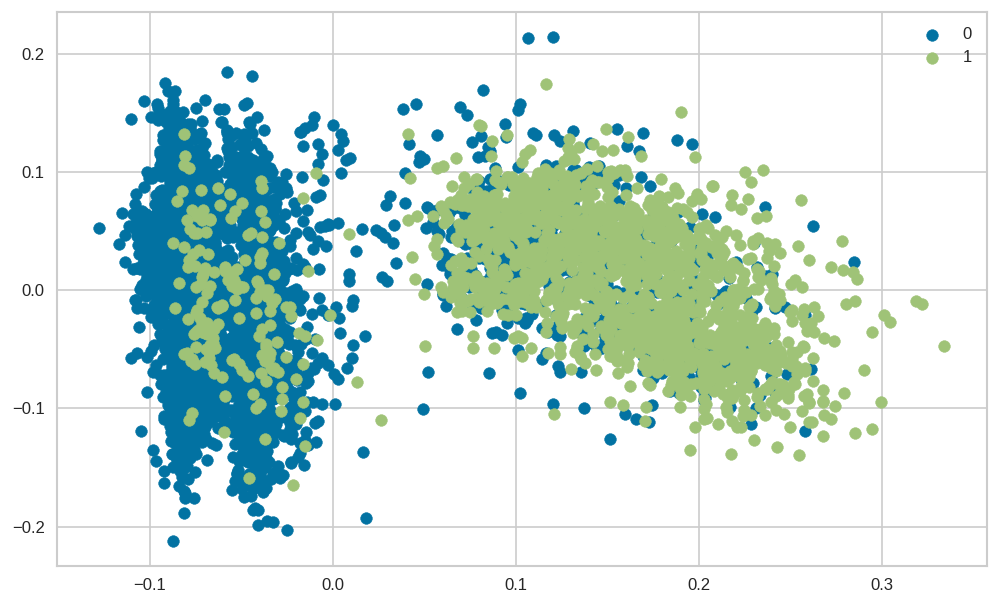

In [63]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

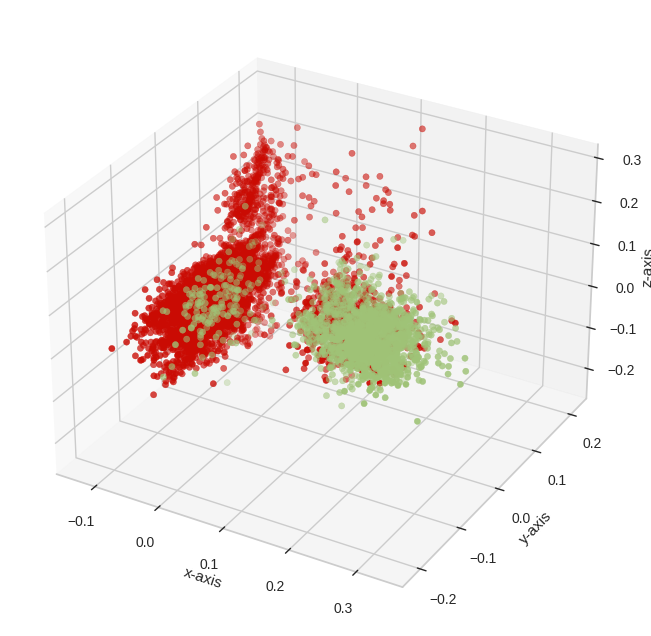

In [64]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y','c','m']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [65]:
# Add cluster values to the dateframe.
data['agglomerative_cluster'] = Agmodel.labels_


In [66]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  data_wordcloud = data[['agglomerative_cluster', column_name]].dropna()
  data_wordcloud = data_wordcloud[data_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in data_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

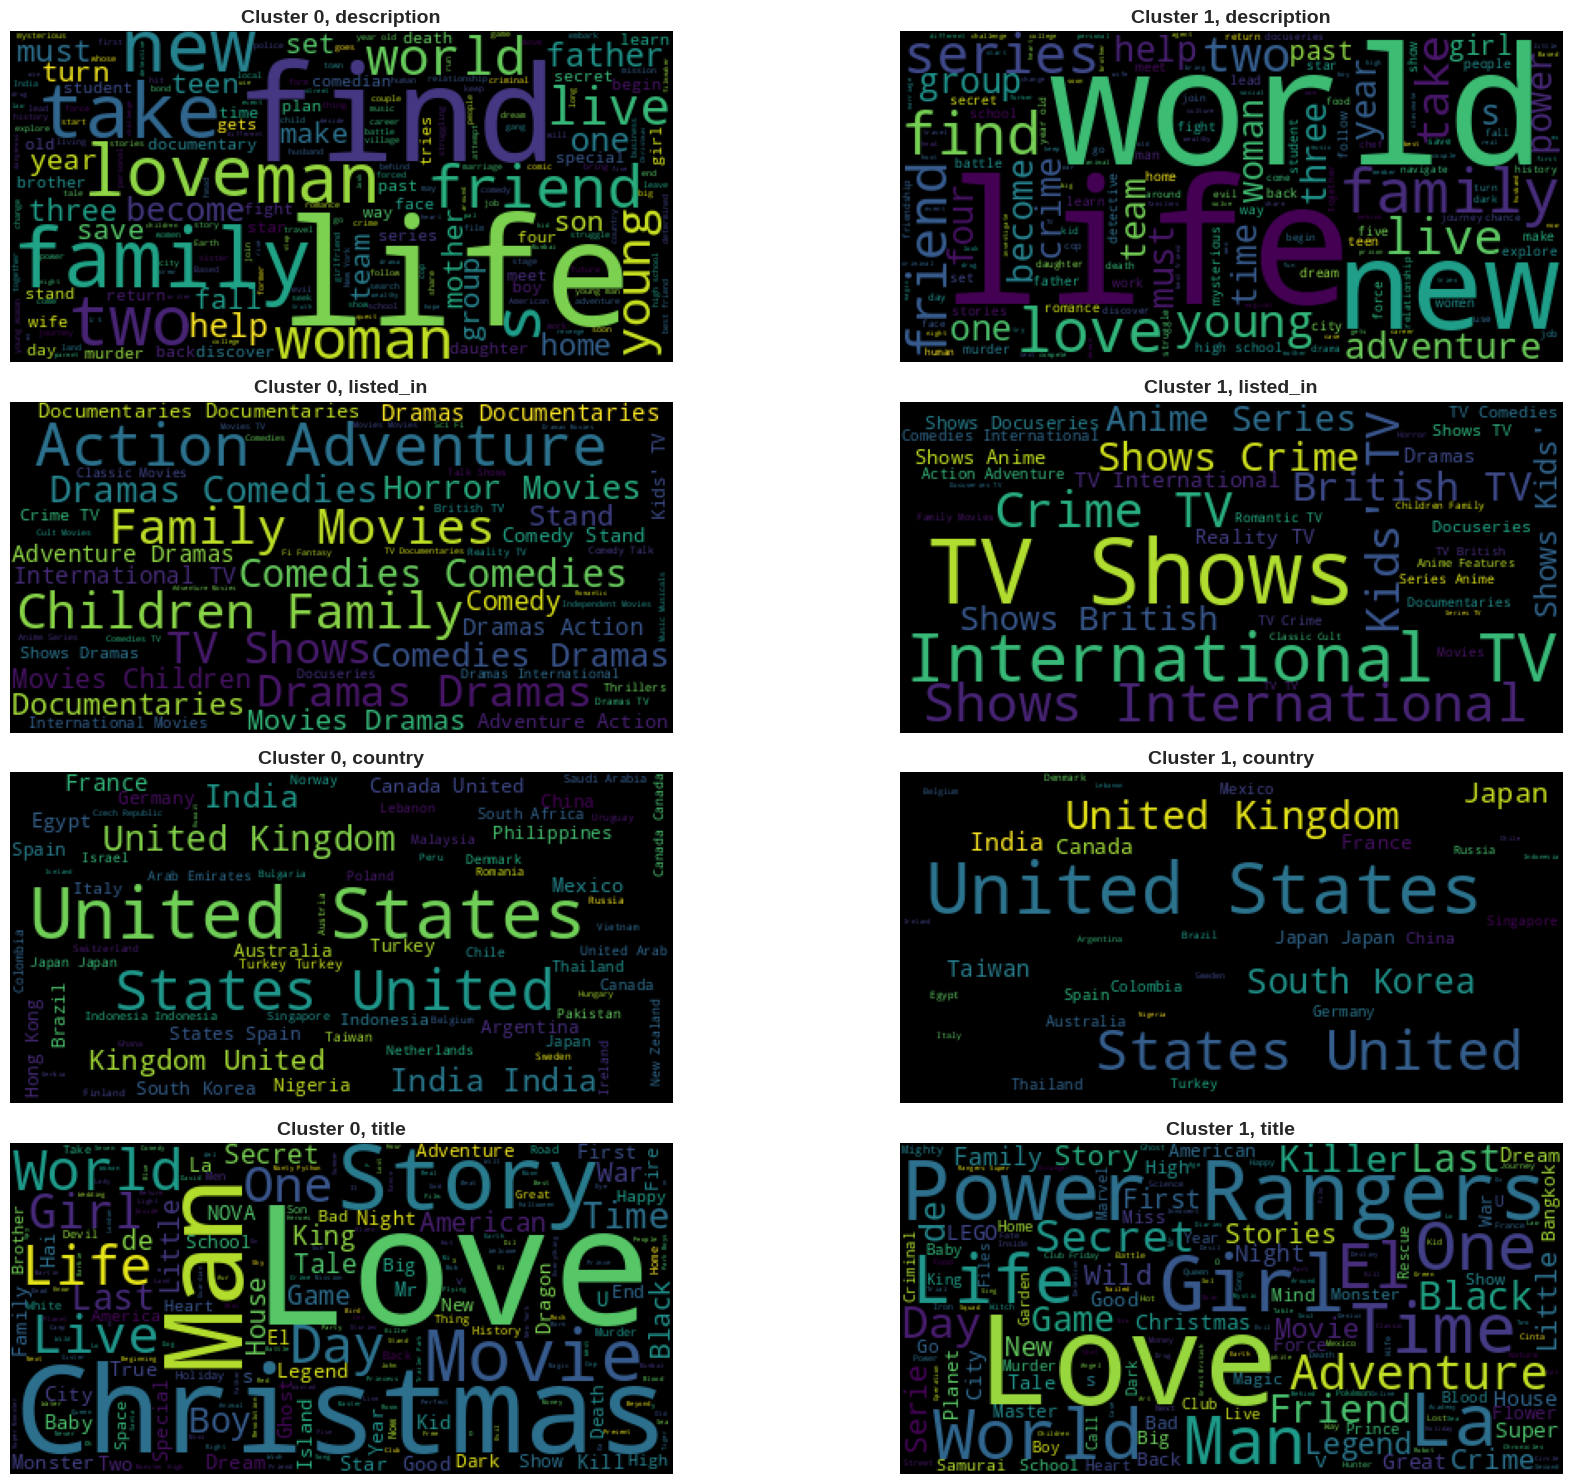

In [67]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [68]:
# Importing needed libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['text_attributes'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=data):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

In [69]:
# Testing indian movie
recommend_content('Kal Ho Naa Ho')

Recommendation  Similarity_score(0-1)
0  Abducted in Plain Sight                 0.1756
1               After Life                 0.1528
2                  Sisters                 0.1490
3                Lady-Like                 0.1433
4              Katti Batti                 0.1310
5          Chashme Baddoor                 0.1300
6                     Edha                 0.1258
7          Chashme Buddoor                 0.1257
8            Patiala House                 0.1162
9                      Amy                 0.1130

In [70]:
# Testing non indian movie
recommend_content('Zombieland')

Recommendation  Similarity_score(0-1)
0      30 Minutes or Less                 0.1849
1        True to the Game                 0.1432
2              Rust Creek                 0.1314
3            Black Summer                 0.1302
4              Submission                 0.1267
5        The Bridge Curse                 0.1217
6  The Ottoman Lieutenant                 0.1158
7  The Last Kids on Earth                 0.1151
8              Grand Army                 0.1114
9               Lady-Like                 0.1101

In [71]:
# Testing indian tv show
recommend_content('Zindagi Gulzar Hai')

Recommendation  Similarity_score(0-1)
0       Bangkok Bachelors                 0.2236
1         Love Me As I Am                 0.2113
2                Humsafar                 0.1938
3         Yeh Meri Family                 0.1577
4         College Romance                 0.1490
5  The Girl from the Song                 0.1465
6    Accidentally in Love                 0.1451
7   A Thousand Goodnights                 0.1407
8              Second 20s                 0.1351
9                  Janaan                 0.1310

In [72]:
# Testing non indian tv show
recommend_content('Vampires')

Recommendation  Similarity_score(0-1)
0                   Balto                 0.2506
1      The Little Vampire                 0.2255
2                Dinotrux                 0.2188
3  The Bonfire of Destiny                 0.2104
4                 The End                 0.1933
5          Vampire Knight                 0.1712
6             Van Helsing                 0.1705
7     Liar, Liar, Vampire                 0.1673
8           The Originals                 0.1637
9               The Crown                 0.1636